In [54]:
import pandas as pd
import matplotlib.pyplot as plt


In [55]:


df = pd.read_csv("Medical Appointment No Shows.csv")

print(df.head())
print(df.shape)


      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [70]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [81]:
df = df.drop(columns=["AppointmentID"])



In [82]:
df = df.drop(columns=["PatientId"])


In [15]:
df["scheduled_day"] = pd.to_datetime(df["ScheduledDay"]).dt.dayofweek


In [84]:
df["Gender"] = df["Gender"].str.strip().str.upper()
df["Neighbourhood"] = df["Neighbourhood"].str.strip().str.title()
df["No-show"] = df["No-show"].str.strip().str.title()


In [18]:
print(df["ScheduledDay"].dtype)


object


In [52]:
df = df[(df["Age"] > 0) & (df["Age"] < 100)]


In [77]:

df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"], utc=True, errors="coerce")
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"], errors="coerce")


In [78]:

print(df[["ScheduledDay", "AppointmentDay"]].isnull().sum())


ScheduledDay      0
AppointmentDay    0
dtype: int64


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75715 entries, 1 to 110526
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   PatientId          75715 non-null  float64            
 1   AppointmentID      75715 non-null  int64              
 2   Gender             75715 non-null  object             
 3   ScheduledDay       75715 non-null  datetime64[ns, UTC]
 4   AppointmentDay     75715 non-null  datetime64[ns, UTC]
 5   Age                75715 non-null  int64              
 6   Neighbourhood      75715 non-null  object             
 7   Scholarship        75715 non-null  int64              
 8   Hipertension       75715 non-null  int64              
 9   Diabetes           75715 non-null  int64              
 10  Alcoholism         75715 non-null  int64              
 11  Handcap            75715 non-null  int64              
 12  SMS_received       75715 non-null  int64          

In [64]:
print(df["Hipertension"].dtype)


int64


In [45]:
df = df.drop(columns=["scheduled_day"])


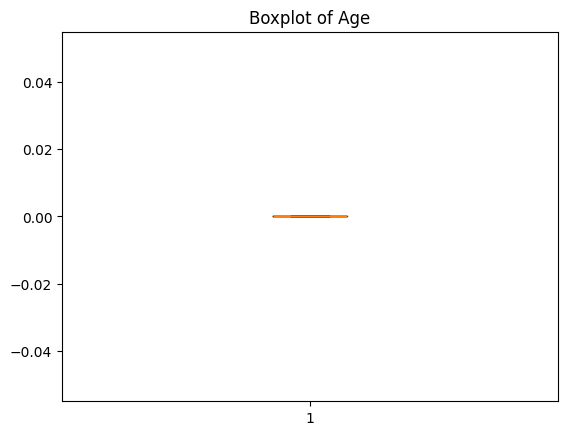

In [69]:


plt.boxplot(df["Diabetes"])
plt.title("Boxplot of Age")
plt.show()


In [68]:
num_cols = ["Scholarship", "Alcoholism", "Handcap", "SMS_received", "Hipertension", "Diabetes"]

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower) & (df[col] <= upper)]


In [68]:
num_cols = ["Scholarship", "Alcoholism", "Handcap", "SMS_received", "Hipertension", "Diabetes"]

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower) & (df[col] <= upper)]


In [80]:
df["waiting_days"] = (df["AppointmentDay"] - df["ScheduledDay"]).dt.days

In [73]:
df["age_group"] = pd.cut(
    df["Age"],
    bins=[0, 12, 19, 35, 60, 100],
    labels=["Child", "Teen", "YoungAdult", "Adult", "Senior"]
)


In [74]:
df["health_conditions"] = (
    df["Hipertension"] +
    df["Diabetes"] +
    df["Alcoholism"]
)


In [75]:
df["received_sms"] = df["SMS_received"].apply(lambda x: "Yes" if x == 1 else "No")


In [94]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_group,health_conditions,received_sms,waiting_days
1,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,39,0,0,0,0,0,0,0,0,0,No,-1
2,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,45,0,0,0,0,0,0,0,2,0,No,-1
3,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,54,0,0,0,0,0,0,0,1,0,No,-1
6,0,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,25,0,0,0,0,0,0,1,4,0,No,1
7,0,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,25,0,0,0,0,0,0,1,0,0,No,1


In [86]:
df["age_group"].unique

<bound method Series.unique of 1              Adult
2             Senior
3              Child
6         YoungAdult
7              Adult
             ...    
110522         Adult
110523         Adult
110524    YoungAdult
110525         Adult
110526         Adult
Name: age_group, Length: 75715, dtype: category
Categories (5, object): ['Child' < 'Teen' < 'YoungAdult' < 'Adult' < 'Senior']>

In [88]:
df["age_group"] = df["age_group"].replace({"YoungAdult":"Young"})


In [90]:
df["age_group"].value_counts()

age_group
Adult     23041
Young     18264
Child     15344
Teen       7845
Senior     7732
Name: count, dtype: int64

In [92]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [93]:
cat_cols = ["Gender", "Neighbourhood", "age_group", "No-show"]

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [95]:
df.to_csv("clean_medical_appointments.csv", index=False)
